# Stock Fundamental Analysis

This notebook demonstrates the usage of the modular stock analysis architecture. The architecture separates concerns into distinct modules:
1. Data retrieval
2. Financial analysis
3. Technical analysis
4. Visualization
5. AI-powered analysis
6. Report generation and export

In [2]:
# Add the project root directory to the Python path to allow importing from src
import sys
import os

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Go up one level to reach the project root if needed
project_root = os.path.dirname(current_dir) if current_dir.endswith('src') else current_dir

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")
else:
    print("Project root already in Python path")

# Show the current Python path for debugging
print(f"Current working directory: {os.getcwd()}")
print(f"Python path: {sys.path}")

Added /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals to Python path
Current working directory: /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/src
Python path: ['/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python310.zip', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10/lib-dynload', '', '/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/.venv/lib/python3.10/site-packages']


In [3]:
# Import required libraries and custom modules
import os
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image, HTML
from datetime import datetime
import matplotlib.pyplot as plt

# Import our custom modules
from src.data import StockData
from src.financial_analysis import FinancialAnalysis
from src.technical_analysis import TechnicalAnalysis
from visualization import StockVisualization
from src.ai_analysis import AIAnalysis
from src.reporting import ReportGenerator

# To silence future warnings
import warnings
warnings.filterwarnings('ignore')

## Input Stock Symbol

Enter the stock symbol you want to analyze.

In [4]:
# Input stock symbol
stock_symbol = "FSLR" # "FSLR"  # You can replace with input() to take user input
print(f"Analyzing {stock_symbol}...")

Analyzing FSLR...


## 1. Data Collection

Let's gather historical price data, company information, and financial statements using our `StockData` class.

In [5]:
# Initialize StockData
stock_data = StockData(stock_symbol)

# Fetch stock data
if stock_data.fetch_stock_data(years=2):
    company_info = stock_data.get_company_info()
    print(f"Company: {company_info['company_name']}")
    print(f"Sector: {company_info['sector']}")
    print(f"Industry: {company_info['industry']}")
    print(f"Current Price: ${company_info['current_price']}")
    
    # Fetch financial statements
    stock_data.fetch_financial_statements()

Company: First Solar, Inc.
Sector: Technology
Industry: Solar
Current Price: $141.86


In [6]:
# Calculate price trends
price_trends = stock_data.calculate_price_trends()
print("\nPrice Trends:")
print(price_trends)


Price Trends:
3-month price change: -13.66% (Change in closing price over the last 3 months)
6-month price change: -30.81% (Change in closing price over the last 6 months)
12-month price change: -21.55% (Change in closing price over the last 12 months)
All-time high: $300.71 on 2024-06-12 (Highest closing price in available data)
All-time low: $120.38 on 2025-04-08 (Lowest closing price in available data)


## 2. Financial Ratio Analysis

Calculate and visualize key financial ratios that are important for fundamental analysis.

In [7]:
# Initialize Financial Analysis
fin_analysis = FinancialAnalysis(stock_data)

# Calculate financial ratios
financial_ratios = fin_analysis.calculate_financial_ratios()

# Format and display ratios
ratios_df = fin_analysis.format_financial_ratios(financial_ratios)
print("\nKey Financial Ratios:")
display(ratios_df)


Key Financial Ratios:


,Ratio,Formatted Value
0,P/E Ratio,11.80
1,Forward P/E,6.80
2,P/B Ratio,1.90
3,P/S Ratio,3.62
4,EV/EBITDA,7.77
5,PEG Ratio,0.93
6,Gross Margin,44.17%
7,Operating Margin,30.17%
8,Net Profit Margin,30.72%
9,ROE,17.62%


In [8]:
# Get financial highlights
financial_highlights = fin_analysis.get_financial_highlights()
print("\nRecent Annual Financial Highlights (in millions USD):")
print(financial_highlights)


Recent Annual Financial Highlights (in millions USD):
Revenue: $4206.29M
Net Income: $1292.04M
EBITDA: $1868.71M
Total Assets: $12124.36M
Total Liabilities: $4146784000.00M
Equity: $-4146771875.64M


## 3. Historical Price and Volume Analysis

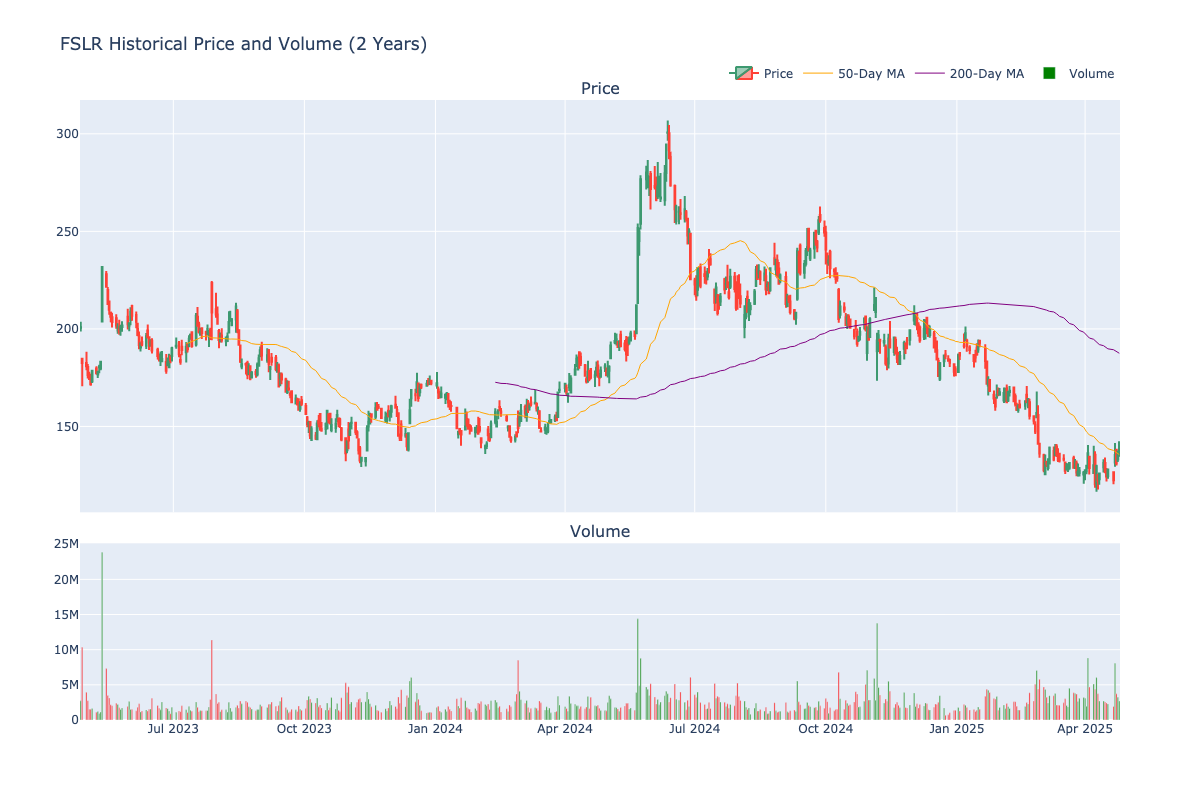

In [9]:
# Initialize Visualization
viz = StockVisualization(stock_data)

# Create price and volume chart
price_volume_chart = viz.create_price_volume_chart()

# Display the chart
viz.safe_plot_display(price_volume_chart, static=True)
# TODO: Create static display image method

## 4. Technical Analysis Indicators

In [39]:
# Initialize Technical Analysis
tech_analysis = TechnicalAnalysis(stock_data)

# Calculate technical indicators
tech_data = tech_analysis.calculate_technical_indicators()

# Get recent indicator values for later use in AI analysis
recent_indicators = tech_analysis.get_recent_indicators(tech_data)
print("Recent Technical Indicators:")
for indicator, value in recent_indicators.items():
    print(f"{indicator}: {value:.2f}")

Recent Technical Indicators:
Close: 127.98
RSI: 50.50
MACD: -3.19
MACD_Signal: -4.03
MACD_Histogram: 0.84
ATR: 9.38
BB_Upper: 134.94
BB_Middle: 127.96
BB_Lower: 120.99


In [ ]:
# Create technical analysis chart
tech_chart = viz.create_technical_chart(tech_data)

# Display the chart
viz.safe_plot_display(tech_chart)
# TODO: Create static display image method

## 5. News and Geopolitical Analysis

Let's fetch and analyze recent news about the company using OpenAI. Ensure you have an OpenAI API key stored in your environment variables or in a .env file.

In [41]:
# Initialize AI Analysis module
ai = AIAnalysis()  # Will use OPENAI_API_KEY from environment variables

OpenAI client initialized successfully.


In [42]:
# Get news analysis
company_name = company_info['company_name']
news_analysis = ai.get_news_analysis(company_name, stock_symbol, price_trends)
print(f"\nNews and Geopolitical Analysis for {company_name} ({stock_symbol}):\n")

# Display formatted news analysis
ReportGenerator.display_markdown(news_analysis)


News and Geopolitical Analysis for First Solar, Inc. (FSLR):



**Comprehensive Analysis of First Solar, Inc. (FSLR)**

As of April 20, 2025, First Solar, Inc. (FSLR) has experienced notable fluctuations in its stock performance, with a 3-month decline of 33.65%, a 6-month decline of 34.79%, and a 12-month decline of 27.40%. The stock reached its all-time high of $300.71 on June 12, 2024, and its all-time low of $120.38 on April 8, 2025.

**1. Recent Earnings Reports and Financial Performance**

- **Q4 2024 Earnings (Reported February 25, 2025):**
  - **Net Income:** $393 million, a 13% increase from the previous year.
  - **Earnings Per Share (EPS):** $3.65, missing analyst estimates of $4.64.
  - **Revenue:** $1.51 billion, slightly above expectations of $1.48 billion.
  - **2025 Guidance:** Projected net sales between $5.3 billion and $5.8 billion, with EPS between $17.00 and $20.00. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**2. Stock Price Development**

- **Recent Performance:**
  - **Current Price:** $127.98, with a 3.6% increase from the previous close.
  - **Intraday High/Low:** $128.50 and $123.32, respectively.
  - **Volume:** 2,279,782 shares traded.
  - **Recent Trend:** The stock has experienced significant volatility, with a notable decline over the past year.

**3. Major Business Developments**

- **Sales Forecast:**
  - First Solar anticipates higher sales for 2025, projecting net sales between $5.3 billion and $5.8 billion, a 32% increase from the previous year. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

- **Legal Action:**
  - The company initiated legal proceedings against JinkoSolar for patent infringement related to TOPCon technology, aiming to protect its intellectual property. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**4. Future Innovations, Partnerships, or Acquisitions**

- **Capacity Expansion:**
  - First Solar is prepared to expand its manufacturing capacity to meet growing demand, indicating potential growth opportunities. ([fintool.com](https://fintool.com/app/research/companies/FSLR/earnings/Q1%202024?utm_source=openai))

**5. Leadership Changes or Organizational Restructuring**

- **Insider Selling:**
  - CEO Mark R. Widmar sold 21,542 shares on February 28, 2025, at an average price of $141.09, reducing his holdings by 17.24%. ([americanbankingnews.com](https://www.americanbankingnews.com/2025/03/05/first-solar-nasdaqfslr-stock-price-down-2-1-following-insider-selling.html?utm_source=openai))

**6. Regulatory Developments Affecting the Company**

- **Tariffs on Solar Imports:**
  - The Biden administration imposed tariffs on solar panel imports from four Southeast Asian countries, benefiting U.S. producers like First Solar. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**7. Macroeconomic Factors Influencing the Company and Its Industry**

- **Demand for Renewable Energy:**
  - Strong demand from corporations and governments for cleaner energy sources supports the growth of the solar industry. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**8. Geopolitical Events Impacting Operations or Supply Chains**

- **Trade Policies:**
  - The U.S. government's tariffs on Southeast Asian solar imports may affect First Solar's supply chain dynamics. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**9. Competitive Landscape Changes**

- **Patent Infringement Lawsuit:**
  - The legal action against JinkoSolar highlights competitive tensions in the solar industry, particularly concerning technological innovations. ([reuters.com](https://www.reuters.com/business/energy/first-solar-forecasts-higher-2025-sales-initiates-legal-action-against-2025-02-25/?utm_source=openai))

**Conclusion**

First Solar, Inc. has demonstrated strong financial performance and strategic initiatives, including increased sales forecasts and legal actions to protect its technology. However, challenges such as stock price volatility, insider selling, and external factors like trade policies and competition may impact its future performance. Investors should monitor these developments closely to assess their potential effects on First Solar's stock price and fundamental value. 

## 6. Comprehensive AI-Generated Analysis Report

Now, let's generate a comprehensive report that analyzes all the data we've collected.

In [43]:
# Generate comprehensive report
print("\nGenerating comprehensive investment analysis report...\n")
comprehensive_report = ai.generate_comprehensive_report(
    stock_symbol,
    stock_data.info,
    financial_ratios,
    recent_indicators,
    news_analysis,
    price_trends=price_trends
)


Generating comprehensive investment analysis report...



In [44]:
# Display the report as formatted markdown
ReportGenerator.display_markdown(comprehensive_report)

# Investment Analysis Report for First Solar, Inc. (FSLR)

## 1. Executive Summary
First Solar, Inc. (FSLR) is a leading player in the solar energy sector, focusing on the manufacturing and deployment of photovoltaic solar modules. As of April 20, 2025, the company has a market capitalization of approximately $13.72 billion. The stock has experienced significant volatility, with a 52-week range of $116.56 to $306.77, and has recently hit an all-time low of $120.38. Despite recent stock price declines, First Solar has reported strong financial performance, including a projected increase in sales for 2025, driven by heightened demand for renewable energy solutions.

## 2. Fundamental Analysis
### Financial Health
- **Market Capitalization:** $13.72 billion
- **P/E Ratio:** 10.65 (indicating the stock is undervalued compared to the industry average)
- **Forward P/E Ratio:** 6.14 (suggests strong future earnings potential)
- **P/B Ratio:** 1.72 (indicates reasonable valuation relative to book value)
- **Gross Margin:** 44.17% (strong profitability)
- **Operating Margin:** 30.17%
- **Net Profit Margin:** 30.72%
- **Current Ratio:** 2.45 (indicating good short-term liquidity)
- **Debt-to-Equity Ratio:** 9.01 (high leverage, indicating potential risk)

### Growth Prospects
- **Revenue Growth (YoY):** 30.7% (strong growth trajectory)
- **Earnings Growth (YoY):** 12.7%
- **2025 Sales Guidance:** Projected between $5.3 billion and $5.8 billion, a 32% increase from the previous year.

## 3. Technical Analysis
- **Current Price:** $127.98
- **52-Week Range:** $116.56 - $306.77
- **3-Month Price Change:** -33.65%
- **6-Month Price Change:** -34.79%
- **12-Month Price Change:** -27.40%
- **RSI:** 50.50 (neutral, indicating no immediate overbought or oversold conditions)
- **MACD:** -3.19 (indicating bearish momentum)
- **Bollinger Bands:** 
  - Upper Band: $134.94
  - Lower Band: $120.99
  - Current Price near the middle band suggests potential for price stabilization.

## 4. News Impact Analysis
Recent news has significant implications for FSLR:
- **Earnings Report:** Q4 2024 earnings showed a net income increase of 13%, but EPS missed expectations, which may have contributed to stock volatility.
- **Sales Forecast:** The company’s guidance for 2025 indicates strong growth potential, which could support stock recovery.
- **Legal Action:** The lawsuit against JinkoSolar for patent infringement may protect FSLR's market position and enhance its competitive edge.
- **Tariffs on Imports:** Tariffs on solar imports from Southeast Asia could benefit U.S. manufacturers like FSLR, potentially increasing market share.

## 5. Risk Assessment
- **High Debt Levels:** The debt-to-equity ratio of 9.01 indicates significant leverage, which may pose risks in a rising interest rate environment.
- **Market Volatility:** The stock has shown considerable price fluctuations, which could deter risk-averse investors.
- **Competitive Landscape:** Intense competition and potential legal challenges in the solar industry could impact profitability.
- **Regulatory Risks:** Changes in government policies or tariffs could affect operational costs and market dynamics.

## 6. Investment Outlook
### Strengths
- Strong revenue and earnings growth projections.
- Robust gross and net profit margins.
- Strategic legal actions to protect intellectual property.

### Weaknesses
- High debt levels may pose risks.
- Recent stock price volatility could deter investors.

### Opportunities
- Expanding manufacturing capacity to meet increasing demand.
- Growing market for renewable energy solutions.

### Threats
- Intense competition in the solar industry.
- Regulatory changes affecting tariffs and trade policies.

## 7. Recommendation
**Recommendation: Buy**

### Rationale:
- **Valuation:** With a low P/E ratio and strong growth prospects, FSLR appears undervalued relative to its potential.
- **Growth Potential:** The projected revenue increase and strong demand for solar energy present significant upside.
- **Market Position:** Legal protections and tariffs favoring U.S. manufacturers position FSLR well in the competitive landscape.

Investors should consider the current price as an attractive entry point, especially given the company's strong fundamentals and growth trajectory. However, they should remain vigilant regarding market volatility and external risks.

## 7. Export Report to PDF (Optional)

You can save the comprehensive report to a PDF file for sharing or future reference.

In [45]:
# Export report to PDF
report_status = ReportGenerator.export_report_to_pdf(comprehensive_report, stock_symbol)
print(report_status)

Report successfully exported to FSLR_analysis_report.pdf


In [58]:
# TODO: try this post to check exporting to PDf again
# https://saturncloud.io/blog/how-to-export-jupyter-notebook-by-vscode-in-pdf-format/